<a href="https://colab.research.google.com/github/manpriyad/Alt/blob/master/Feature_Engineering_Live_sessions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link :  https://www.youtube.com/watch?v=k-EpAMjw6AE

In [1]:
import pandas as pd
import numpy as np

In [11]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# Univariate selection 

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Apply k best algorithm

In [17]:
ordered_rank_features=SelectKBest(score_func=chi2,k=10) # select top 10 features

In [20]:
ordered_features= ordered_rank_features.fit(x,y)
ordered_features

SelectKBest(k=10, score_func=<function chi2 at 0x7fb4aced1050>)

In [26]:
features_rank=pd.DataFrame(ordered_features.scores_,index=x.columns,columns=['Score'])
features_rank

,Score
battery_power,14129.866576
blue,0.723232
clock_speed,0.648366
dual_sim,0.631011
fc,10.135166
four_g,1.521572
int_memory,89.839124
m_dep,0.745820
mobile_wt,95.972863
n_cores,9.097556


In [27]:
features_rank.nlargest(5,'Score') 

,Score
ram,931267.519053
px_height,17363.569536
battery_power,14129.866576
px_width,9810.586750
mobile_wt,95.972863


## Feature importance

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
import matplotlib.pyplot as plt


In [30]:
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [36]:
feature_imp=pd.DataFrame(model.feature_importances_,index=x.columns,columns=['Feature_imp'])
feature_imp

,Feature_imp
battery_power,0.061946
blue,0.020151
clock_speed,0.034334
dual_sim,0.019920
fc,0.032674
four_g,0.017285
int_memory,0.035401
m_dep,0.035051
mobile_wt,0.036789
n_cores,0.033767


In [39]:
feature_imp.nlargest(5,'Feature_imp') 

,Feature_imp
ram,0.389445
battery_power,0.061946
px_width,0.048645
px_height,0.046118
mobile_wt,0.036789


In [40]:
features_rank.nlargest(5,'Score') 

,Score
ram,931267.519053
px_height,17363.569536
battery_power,14129.866576
px_width,9810.586750
mobile_wt,95.972863


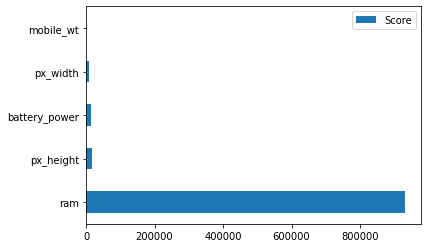

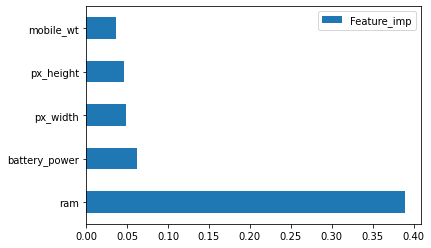

In [44]:
features_rank.nlargest(5,'Score').plot(kind='barh')
feature_imp.nlargest(5,'Feature_imp').plot(kind='barh')

## Pearson correlation :

In [45]:
import seaborn as sns

In [47]:
corr=df.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


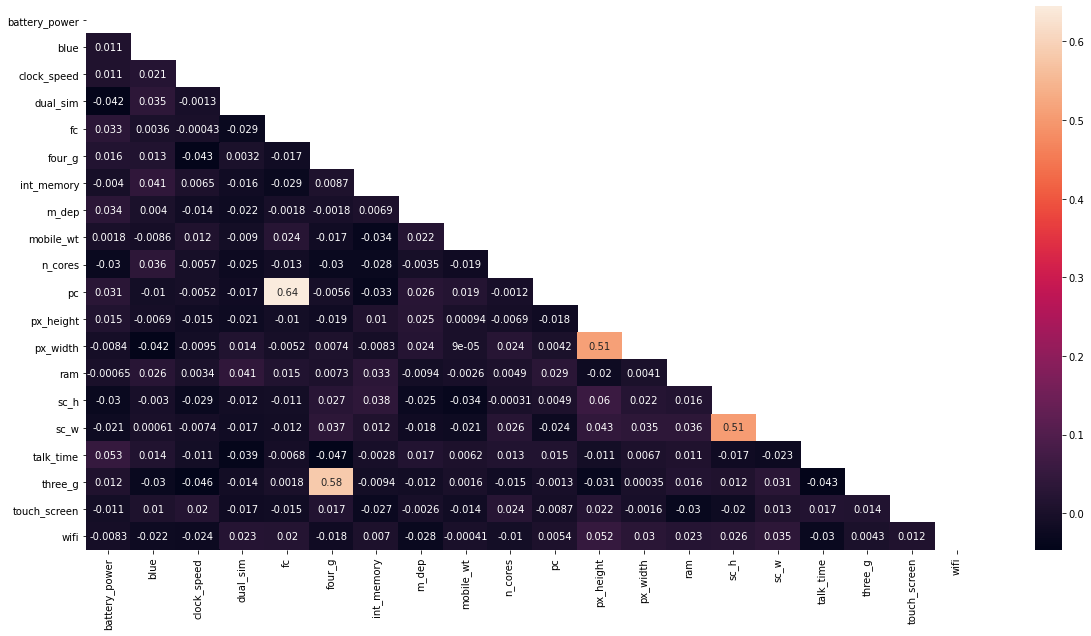

In [54]:
corr= df.iloc[:,:-1].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
plt.figure(figsize=(20,10))
# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)

## Mutual information classification

In [55]:
from sklearn.feature_selection import mutual_info_classif

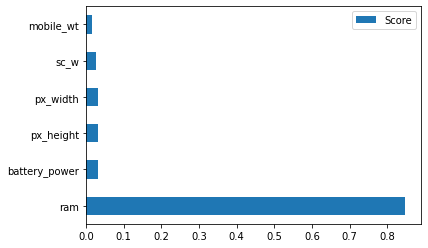

In [61]:
mutual_info=mutual_info_classif(x,y)
mutual_info=pd.DataFrame(mutual_info,index=x.columns,columns=['Score'])
mutual_info.nlargest(6,'Score').plot(kind='barh')

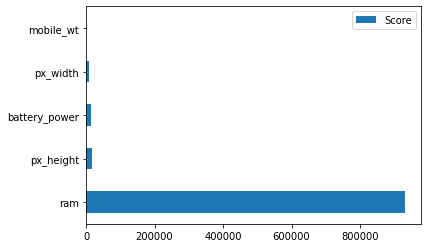

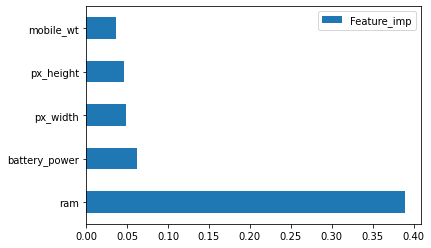

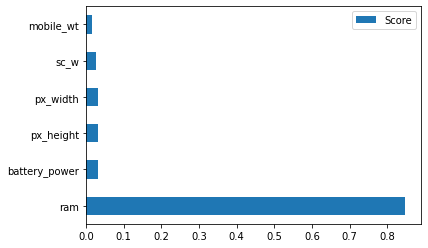

In [62]:
features_rank.nlargest(5,'Score').plot(kind='barh')
feature_imp.nlargest(5,'Feature_imp').plot(kind='barh')
mutual_info.nlargest(6,'Score').plot(kind='barh')
